# AdaBoost Classification Algorithm

In [1]:
#Goal here is to see if we can harness the power of machine learning and boosting to help create 
#not just a predictive model,but a general guideline for features people should look
#out for when picking mushrooms.

# 1.Business Problem Understanding

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [5]:
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# EDA

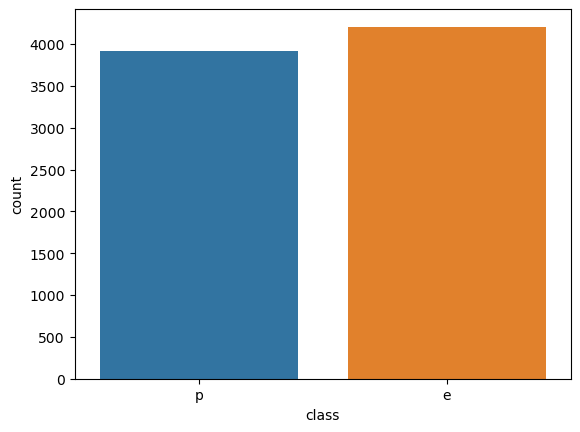

In [10]:
sns.countplot(data=df,x='class')
plt.show()

In [12]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [14]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [16]:
#X & y

In [17]:
X=pd.get_dummies(df.drop('class',axis=1),drop_first=True)
y=df['class']

In [18]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [20]:
X.shape,y.shape

((8124, 95), (8124,))

# Train/Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

# Modelling

In [29]:
from sklearn.ensemble import AdaBoostClassifier

In [30]:
model=AdaBoostClassifier()

In [32]:
model.fit(X_train,y_train)

AdaBoostClassifier()

# Prediction

In [33]:
ypred_train=model.predict(X_train)

In [46]:
predictions=model.predict(X_test)

# Evaluation

#Accuracy

In [47]:
from sklearn.metrics import accuracy_score
print("Train accuracy:",accuracy_score(y_train,ypred_train))
print("Train accuracy:",accuracy_score(y_test,predictions))

Train accuracy: 1.0
Train accuracy: 1.0


#Confusion Matrix

In [51]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(model,X_test,y_test)
#plt.show()

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1274
           p       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



#Cross Validation Score

In [56]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
print("Cross Validation Score :",scores.mean())

Cross Validation Score : 0.9133198938992043


# Hyperparameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
#model
estimator = AdaBoostClassifier()

#Parameters (which you want to tune and identify the best)
param_grid={'n_estimators':list(range(1,101))}

In [60]:
grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

In [62]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [68]:
grid.best_params_

{'n_estimators': 17}

# Final Model

In [72]:
final_model=AdaBoostClassifier(n_estimators=17)
final_model.fit(X_train,y_train)

preds_train=final_model.predict(X_train)
preds_test=final_model.predict(X_test)

print("Train Accuracy Score: ",accuracy_score(y_train,preds_train))
print("Test Accuracy Score: ",accuracy_score(y_test,preds_test))

Train Accuracy Score:  1.0
Test Accuracy Score:  1.0


#Feature Importance

In [76]:
final_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05882353, 0.05882353, 0.05882353,
       0.        , 0.        , 0.11764706, 0.05882353, 0.        ,
       0.        , 0.        , 0.        , 0.11764706, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05882353, 0.        , 0.        , 0.        , 0.        ,
       0.05882353, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05882353, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [81]:
feats=pd.DataFrame(index=X.columns,data=final_model.feature_importances_,
columns=['Importance'])
feats

,Importance
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [82]:
imp_feats=feats[feats['Importance']>0]
imp_feats.sort_values("Importance")

,Importance
bruises_t,0.058824
odor_c,0.058824
odor_f,0.058824
odor_p,0.058824
stalk-surface-above-ring_k,0.058824
stalk-surface-below-ring_y,0.058824
stalk-color-below-ring_n,0.058824
spore-print-color_r,0.058824
population_c,0.058824
odor_n,0.117647


In [83]:
plt.figure(figsize=(14,6),dpi=200)


<Figure size 2800x1200 with 0 Axes>

<Figure size 2800x1200 with 0 Axes>

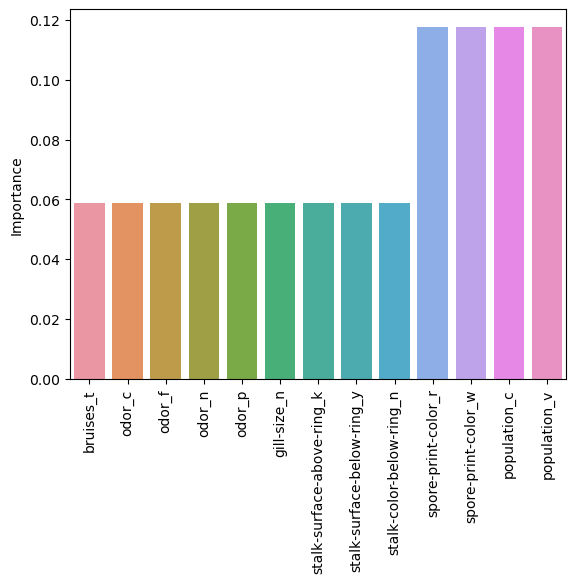

In [86]:
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.index,
y='Importance')
plt.xticks(rotation=90)
plt.show()